# Setup
* libraries
* pandas.read_csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

import requests
from bs4 import BeautifulSoup
from requests.exceptions import ConnectionError, Timeout, RequestException

In [2]:
os.listdir('../data')

['.DS_Store', 'cleaned_players.csv', 'df_eng.csv']

In [3]:
df = pd.read_csv('../data/cleaned_players.csv', index_col = 0)
df.head()

,id_players,player_name,birthday,height,weight,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,67.0,71.0,right,medium,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
5,2,Aaron Cresswell,1989-12-15 00:00:00,170.18,146,74.0,76.0,left,high,medium,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
47,3,Aaron Doran,1991-05-13 00:00:00,170.18,163,71.0,78.0,right,medium,medium,...,72.0,63.0,22.0,21.0,21.0,15.0,10.0,11.0,8.0,12.0
83,4,Aaron Galindo,1982-05-08 00:00:00,182.88,198,75.0,82.0,right,medium,high,...,54.0,60.0,80.0,78.0,70.0,14.0,11.0,65.0,11.0,10.0
106,5,Aaron Hughes,1979-11-08 00:00:00,182.88,154,78.0,81.0,right,medium,medium,...,60.0,81.0,82.0,83.0,77.0,12.0,20.0,57.0,20.0,20.0


# Preprocessing
* id_players from int64 to object
* preferred_foot encoded (left:0, right:1)
* attacking_work_rate encoded (low:0, medium:1, high:2)
* defensive_work_rate encoded (low:0, medium:1, high:2)

In [4]:
# Initial Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9844 entries, 0 to 183972
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_players           9844 non-null   int64  
 1   player_name          9844 non-null   object 
 2   birthday             9844 non-null   object 
 3   height               9844 non-null   float64
 4   weight               9844 non-null   int64  
 5   overall_rating       9844 non-null   float64
 6   potential            9844 non-null   float64
 7   preferred_foot       9844 non-null   object 
 8   attacking_work_rate  9844 non-null   object 
 9   defensive_work_rate  9844 non-null   object 
 10  crossing             9844 non-null   float64
 11  finishing            9844 non-null   float64
 12  heading_accuracy     9844 non-null   float64
 13  short_passing        9844 non-null   float64
 14  volleys              9844 non-null   float64
 15  dribbling            9844 non-null   floa

In [5]:
# Let's convert ID to object so that it does not interfere with our calculations
df['id_players'] = df['id_players'].astype('object')

# Mapping dictionaries
foot_mapping = {
    'left': 0,
    'right': 1
}

workrate_mapping = {
    'low': 0,
    'medium': 1,
    'high': 2
}

# Convert the columns
df['preferred_foot'] = df['preferred_foot'].replace(foot_mapping)
df['attacking_work_rate'] = df['attacking_work_rate'].replace(workrate_mapping) 
df['defensive_work_rate'] = df['defensive_work_rate'].replace(workrate_mapping)

# Check the value counts to see if the encoding worked
print(df['preferred_foot'].value_counts())
print()
print(df['attacking_work_rate'].value_counts())
print()
print(df['defensive_work_rate'].value_counts())

preferred_foot
1    7437
0    2407
Name: count, dtype: int64

attacking_work_rate
1       6871
2       2388
0        489
norm      55
le        14
stoc      14
y         13
Name: count, dtype: int64

defensive_work_rate
1        7315
2        1519
0         903
ormal      55
ean        14
tocky      14
es         13
9           2
4           2
5           2
6           2
1           1
2           1
3           1
Name: count, dtype: int64


/var/folders/xs/s4fj4wdx6f7fkjpgcmjzz2lc0000gn/T/ipykernel_1797/703262197.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['preferred_foot'] = df['preferred_foot'].replace(foot_mapping)


* We have a lot of invalid values for defensive and attacking work rate which are small enough for us to remove
* We will remove this from our dataset so that we can continue the analysis

In [6]:
valid_values = [0, 1, 2]

# Filtering only the valid values in both columns
df = df[df['attacking_work_rate'].isin(valid_values)]
df = df[df['defensive_work_rate'].isin(valid_values)]

# Converting from object to integer
df['attacking_work_rate'] = df['attacking_work_rate'].astype('int64')
df['defensive_work_rate'] = df['defensive_work_rate'].astype('int64')


In [7]:
# New Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9737 entries, 0 to 183972
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_players           9737 non-null   object 
 1   player_name          9737 non-null   object 
 2   birthday             9737 non-null   object 
 3   height               9737 non-null   float64
 4   weight               9737 non-null   int64  
 5   overall_rating       9737 non-null   float64
 6   potential            9737 non-null   float64
 7   preferred_foot       9737 non-null   int64  
 8   attacking_work_rate  9737 non-null   int64  
 9   defensive_work_rate  9737 non-null   int64  
 10  crossing             9737 non-null   float64
 11  finishing            9737 non-null   float64
 12  heading_accuracy     9737 non-null   float64
 13  short_passing        9737 non-null   float64
 14  volleys              9737 non-null   float64
 15  dribbling            9737 non-null   floa

# Feature Engineering
1. birth_year instead of birthday
2. age 
3. position (webscraping transfermarkt.com)
4. country (webscraping transfermarkt.com)

In [8]:
# Convert birthday to datetime if not already
df['birthday'] = pd.to_datetime(df['birthday'])

# Extract year
df['birth_year'] = df['birthday'].dt.year

# Calculate age (as of 2024)
current_year = 2024
df['age'] = current_year - df['birth_year']

# Drop original birthday column if no longer needed
df = df.drop('birthday', axis=1)

In [9]:
# # Webscraping Position
# positions = []
# n = len(df)

# for i in range(n):
#     player_name = df.iloc[i]['player_name'].lower()
#     search_url = f"https://www.transfermarkt.com/schnellsuche/ergebnis/schnellsuche?query={'+'.join(player_name.split())}"
    
#     try:
#         response = requests.get(search_url, headers={"User-Agent": "Mozilla/5.0"}, timeout=10)
#         soup = BeautifulSoup(response.content, 'html.parser')
#         position_td = soup.find('td', class_='zentriert')
        
#         if position_td:
#             position = position_td.get_text(strip=True)
#             positions.append(position)
#             print(f"Player {i}/{n} Found! ")
#         else:
#             positions.append(np.nan)
#             print(f"Player {i}/{n} Not Found! ")
    
#     except (ConnectionError, Timeout) as e:
#         positions.append(np.nan)
#         print(f"Player {i}/{n} Failed due to connection issue: {e}")
#     except Exception as e:
#         positions.append(np.nan)
#         print(f"Player {i}/{n} Failed due to unexpected error: {e}")

In [10]:
# Wescraping Countries and Positions of players
countries = []
positions = []
n = len(df)

for i in range(n):
    player_name = df.iloc[i]['player_name'].lower()
    search_url = f"https://www.transfermarkt.com/schnellsuche/ergebnis/schnellsuche?query={'+'.join(player_name.split())}"
    
    try:
        response = requests.get(search_url, headers={"User-Agent": "Mozilla/5.0"}, timeout=10)
        soup = BeautifulSoup(response.content, 'html.parser')

        # Extract position
        position_td = soup.find('td', class_='zentriert')
        position = position_td.get_text(strip=True) if position_td else "NA"

        # Extract country
        country_img_tag = soup.find('img', class_='flaggenrahmen')
        country_name = country_img_tag.get('title') if country_img_tag else "NA"

        # Append the extracted information to the list
        countries.append(country_name)
        positions.append(position)
        print(f"Player {i+1}/{n} Found! Position: {position}, Country: {country_name}")
    
    except (ConnectionError, Timeout) as e:
        countries.append(np.nan)
        positions.append(np.nan)
        print(f"Player {i+1}/{n} Failed due to connection issue: {e}")
    
    except Exception as e:
        countries.append(np.nan)
        positions.append(np.nan)
        print(f"Player {i+1}/{n} Failed due to unexpected error: {e}")


Player 1/9737 Found! Position: CB, Country: Gabon
Player 2/9737 Found! Position: LB, Country: England
Player 3/9737 Found! Position: RM, Country: Ireland
Player 4/9737 Found! Position: CB, Country: Mexico
Player 5/9737 Found! Position: CB, Country: Northern Ireland
Player 6/9737 Found! Position: AM, Country: Germany
Player 7/9737 Found! Position: CM, Country: England
Player 8/9737 Found! Position: RW, Country: England
Player 9/9737 Found! Position: GK, Country: Australia
Player 10/9737 Found! Position: LB, Country: Netherlands
Player 11/9737 Found! Position: CB, Country: South Africa
Player 12/9737 Found! Position: CM, Country: Australia
Player 13/9737 Found! Position: RB, Country: Scotland
Player 14/9737 Found! Position: RW, Country: Spain
Player 15/9737 Found! Position: CM, Country: Wales
Player 16/9737 Found! Position: CM, Country: Scotland
Player 17/9737 Found! Position: LB, Country: Antigua and Barbuda
Player 18/9737 Found! Position: CF, Country: England
Player 19/9737 Found! Posi

In [13]:
df['position'] = positions
df['country'] = countries
df.to_csv('../data/cleaned_players_2.csv', index=False)

In [3]:
df = pd.read_csv('../data/cleaned_players_2.csv')
df.head()

,id_players,player_name,height,weight,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,birth_year,age,position,country
0,1,Aaron Appindangoye,182.88,187,67.0,71.0,1,1,1,49.0,...,69.0,6.0,11.0,10.0,8.0,8.0,1992,32,CB,Gabon
1,2,Aaron Cresswell,170.18,146,74.0,76.0,0,2,1,80.0,...,78.0,14.0,7.0,9.0,9.0,12.0,1989,35,LB,England
2,3,Aaron Doran,170.18,163,71.0,78.0,1,1,1,73.0,...,21.0,15.0,10.0,11.0,8.0,12.0,1991,33,RM,Ireland
3,4,Aaron Galindo,182.88,198,75.0,82.0,1,1,2,60.0,...,70.0,14.0,11.0,65.0,11.0,10.0,1982,42,CB,Mexico
4,5,Aaron Hughes,182.88,154,78.0,81.0,1,1,1,45.0,...,77.0,12.0,20.0,57.0,20.0,20.0,1979,45,CB,Northern Ireland


# Question 1

- Question: How do specific attributes correlate with overall player rating? 
- Rationale: For a client in sports management or a team looking to recruit, understanding which attributes drive player success is crucial. This analysis could highlight the most critical skills for high performance. 

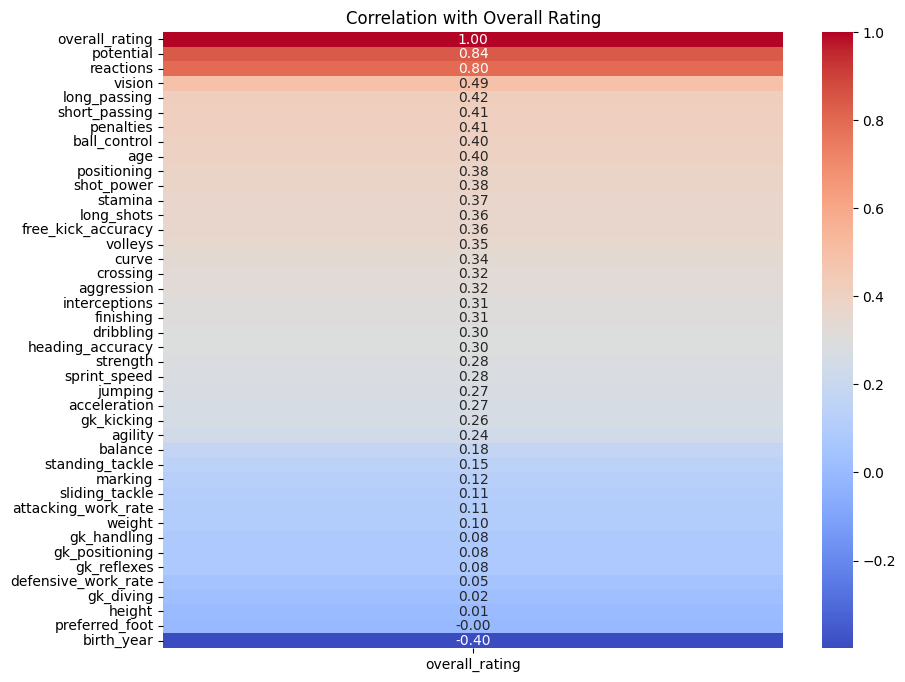

In [54]:
# Compute correlation
correlation = df.corr(numeric_only=True)['overall_rating'].sort_values(ascending=False)

# Plot heatmap for `overall_rating`
plt.figure(figsize=(10, 8))
sns.heatmap(correlation.to_frame(), annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title('Correlation with Overall Rating')
plt.show()


* potential is highly correlated with overall_rating
* the heatmap suggest that elite players could tend to have high level reactions
* playmaking attributes *(vision, long_passing, short_passing)* are the next most related attributes to overall_rating

In [60]:
# Aggregating the overall based on work rates
df.groupby(['defensive_work_rate', 'attacking_work_rate']).agg({'overall_rating': ['min', 'mean', 'max']})

overall_rating                 
                                                   min       mean   max
defensive_work_rate attacking_work_rate                                
0                   0                             64.0  74.193548  86.0
                    1                             54.0  72.548443  94.0
                    2                             52.0  72.299320  93.0
1                   0                             52.0  70.955390  88.0
                    1                             47.0  69.550389  93.0
                    2                             49.0  72.035194  91.0
2                   0                             52.0  72.299465  87.0
                    1                             48.0  72.212360  91.0
                    2                             58.0  74.452489  93.0

* The combinations of work rates have similar results which suggest that there are highly rated players of all play styles

# Question 2

- Question: What combination of physical and technical attributes defines the top-performing players? 
- Rationale: This would help a client (like a sports academy) identify attributes to target when training or recruiting players, creating a blueprint for high-potential profiles. 

In [62]:
# Plotting average overall per height
df.head()

,id_players,player_name,height,weight,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,birth_year,age
0,1,Aaron Appindangoye,182.88,187,67.0,71.0,1,1,1,49.0,...,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1992,32
5,2,Aaron Cresswell,170.18,146,74.0,76.0,0,2,1,80.0,...,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0,1989,35
47,3,Aaron Doran,170.18,163,71.0,78.0,1,1,1,73.0,...,22.0,21.0,21.0,15.0,10.0,11.0,8.0,12.0,1991,33
83,4,Aaron Galindo,182.88,198,75.0,82.0,1,1,2,60.0,...,80.0,78.0,70.0,14.0,11.0,65.0,11.0,10.0,1982,42
106,5,Aaron Hughes,182.88,154,78.0,81.0,1,1,1,45.0,...,82.0,83.0,77.0,12.0,20.0,57.0,20.0,20.0,1979,45


In [63]:
df['height'].describe()

count    9737.000000
mean      181.910642
std         6.399989
min       157.480000
25%       177.800000
50%       182.880000
75%       185.420000
max       208.280000
Name: height, dtype: float64

# Question 3
* Question: What factors influence a player's potential rating, and how accurately can it predict future performance? 
* Rationale: This could assist in scouting and investment decisions for clients, focusing on young players who may grow into valuable assets. 

# Question 4

In [ ]:
dsa

# Question 5
* Question: Which skills show the most improvement with player experience or age? 
* Rationale: This could guide a training organization on which skills to focus on at different player development stages, aligning with age or experience. 

# Question 6
* Question: Do physical attributes (height, weight) correlate with certain skill attributes? For example, are taller players better at defending or goalkeeping? 
* Rationale: This would help clients in fitness and training management understand how physicality impacts skill development. 

In [109]:
remaining = len(df) - len(positions)
remaining

198

In [110]:
for i in range(remaining):
    positions.append(np.nan)

In [112]:
len(positions) == len(df)

True

In [113]:
df['position'] = positions

In [115]:
df['position'].value_counts()

position
CB          1740
CF          1464
CM           989
DM           883
GK           770
RB           660
LB           627
AM           596
RW           470
LW           430
             146
LM           139
RM           116
SS            92
Attack        14
Midfield      13
Defender      12
SW             1
Name: count, dtype: int64

In [116]:
df.position.isnull().sum()

np.int64(575)